In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [111]:
df = pd.read_csv('clustering.csv')

In [112]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [113]:
df.dropna(inplace=True)

In [114]:
data = df.loc[:,['ApplicantIncome','LoanAmount']]
data

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0
...,...,...
376,5703,128.0
377,3232,108.0
378,2900,71.0
379,4106,40.0


In [115]:
X= data.values
X

array([[4.583e+03, 1.280e+02],
       [3.000e+03, 6.600e+01],
       [2.583e+03, 1.200e+02],
       [6.000e+03, 1.410e+02],
       [2.333e+03, 9.500e+01],
       [3.200e+03, 7.000e+01],
       [1.853e+03, 1.140e+02],
       [1.299e+03, 1.700e+01],
       [4.950e+03, 1.250e+02],
       [3.510e+03, 7.600e+01],
       [4.887e+03, 1.330e+02],
       [7.660e+03, 1.040e+02],
       [2.600e+03, 1.160e+02],
       [2.799e+03, 1.220e+02],
       [4.226e+03, 1.100e+02],
       [1.442e+03, 3.500e+01],
       [3.167e+03, 7.400e+01],
       [4.692e+03, 1.060e+02],
       [3.500e+03, 1.140e+02],
       [3.667e+03, 1.440e+02],
       [3.748e+03, 1.100e+02],
       [3.600e+03, 8.000e+01],
       [1.800e+03, 4.700e+01],
       [3.941e+03, 1.340e+02],
       [5.649e+03, 4.400e+01],
       [5.821e+03, 1.440e+02],
       [2.645e+03, 1.200e+02],
       [4.000e+03, 1.440e+02],
       [1.928e+03, 1.000e+02],
       [3.086e+03, 1.200e+02],
       [4.230e+03, 1.120e+02],
       [4.616e+03, 1.340e+02],
       [

C:\Users\Omneya\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

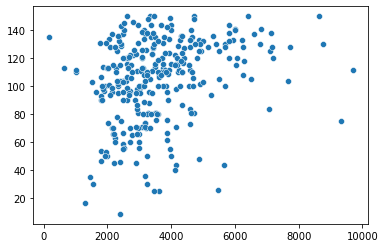

In [116]:
sns.scatterplot(X[:,0], X[:, 1])

In [118]:
centroids = data.sample(n=3).values
centroids

array([[6250.,  128.],
       [5250.,   94.],
       [3430.,  128.]])

In [119]:
def euclidean(x,y):
    d=np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return d

In [144]:
def adjust_centroid(values=X, clust=cluster):
    return pd.DataFrame(X).groupby(by=cluster).mean().values

In [145]:
flag = 1
while flag:
    for i, row in enumerate(X):
        min_dist = 1e6
        for idx, centroid in enumerate(centroids):
            d = euclidean(centroid, row)
            if d < min_dist:
                min_dist = d
                cluster[i] = idx
        new_centroids = adjust_centroid(X,cluster)      

        if np.count_nonzero(centroids-new_centroids) != 0:
            centroids= new_centroids
        else: flag=0

In [151]:
sum(centroids-new_centroids)

array([0., 0.])

In [146]:
distortion = (1/len(X))*(np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2))
distortion

2.1919049039306806

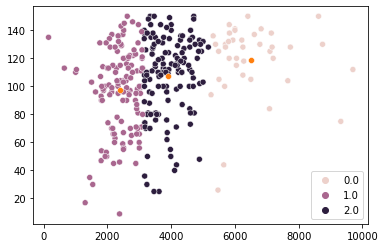

In [156]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(X[:,0], X[:, 1], hue=cluster);
sns.scatterplot(centroids[:,0], centroids[:, 1]);